# Capstone2 Data Wrangling for Mental Health Dataset

## Table of Contents
1. [Objective and Problem Statement](#1.-Objective-and-Problem-Statement)
2. [The Dataset](#2.-The-Dataset)
3. [Import Libraries](#3.-Import-Libraries)
4. [Load Data](#4.-Load-Data)
5. [Data Exploration](#5.-Data-Exploration)
    - [Shape and Structure](#Shape-and-Structure)
    - [Summary Statistics](#Summary-Statistics)
    - [Check for Missing Values](#Check-for-Missing-Values)
6. [Data Visualization](#8.-Data-Visualization)
    - [Visualizing Missing Data](#Visualizing-Missing-Data)
    - [Visualizing Distributions](#Visualizing-Distributions)
    - [Visualizing Relationships](#Visualizing-Relationships)
7. [Data Cleaning](#6.-Data-Cleaning)
    - [Handling Missing Values](#6.-Handling-Missing-Values)
    - [Removing Duplicates](#Removing-Duplicates)
    - [Correcting Data Types](#Correcting-Data-Types)
    - [Renaming Columns](#Renaming-Columns)
8. [Data Transformation](#7.-Data-Transformation)
    - [Feature Engineering](#Feature-Engineering)
    - [Normalization, Standardization](#Normalization,-Standardization)
    - [Encoding Categorical Variables](#Encoding-Categorical-Variables)
9. [Final Dataset Review](#9.-Final-Dataset-Review)
10. [Save Cleaned Data](#10.-Save-Cleaned-Data)
11. [Conclusion](#11.-Conclusion)
12. [References](#12.-References)

### 1. Objective and Problem Statement

The rising demand for mental health services is growing, but resources are unevenly distributed. One significant challenge is the lack of insight into who is most likely to seek mental health support. As a result, care may be delayed or inefficiently allocated, and patients may not receive timely support. **This project seeks to address this challenge by developing a predictive model to identify individuals most likely to seek mental health services in the US**, enabling targeted outreach and resource allocation.

The **objective** of this notebook is to transform the raw mental health dataset into a structured and clean format that is ready for further analysis or model building. 
This involves a series of essential tasks such as handling missing values, detecting outliers, correcting data types, 
removing duplicates, and standardizing the data. Without proper data wrangling, the dataset might lead to biased results, 
incorrect conclusions, or poor model performance. By performing these steps, we ensure that the dataset is accurate, complete, and formatted correctly.





### 2. The Dataset

The dataset was taken from kaggle: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset<br>
Additional references can be found here: https://ourworldindata.org/mental-health

Downloaded as zip file. Size: **2MB**<br>
Dataset file size (unzipped): **31.1MB**<br>

**Dataset Size:**<br> 
 - Rows: **~300K**<br>
 - Columns: **17**<br>

**Features:**<br>
- <i>Timestamp</i> - The time survey was submitted.
- <i>Gender</i> - Male, Female
- <i>Country</i> - Respondent's country.
- <i>Occupation</i> - Respondent profession.
- <i>self_employed</i> - True, False
- <i>family_history</i> - History of family diagnosed with mental health issues.
- <i>treatment</i> - True, False
- <i>Days_Indoors</i> - Number of days the respondent stays indoors
- <i>Growing_Stress</i> - True, False
- <i>Changes_Habits</i> - Yes, Maybe
- <i>Mental_Health_History</i> - No, Maybe
- <i>Mood_Swings</i> - Medium, Low
- <i>Coping_Struggles</i> - True, False
- <i>Work_Interest</i> - No, Maybe
- <i>Social_Weakness</i> - No, Maybe
- <i>mental_health_interview</i> - No, Maybe
- <i>care_options</i> - No, Yes

**Target Variable:**<br>
- <i>treatment</i>


### 3. Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency # Measures correlation between features

### 4. Load Data

In [2]:
# Load data set from csv 'MentalHealthDataSet.csv' using pandas csv reader, loader

df = pd.read_csv('MentalHealthDataSet.csv')
# Show partial rows
df.head() 


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 5. Data Exploration

#### Shape and Structure


In [3]:
# Inspect columns and row size

print(f'Data shape: {df.shape}\n')
# Show column information
df.info()


Data shape: (292364, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object

All column dtypes are string objects.<br>

We need to convert most of the column values to numeric discrete types.<br>

Further exploration is required for the features **care_options**, **work_interest**, **Social_weakness**. We need to understand the purpose of these features.

We can drop Country and keep US only respondents.

#### Summary Statistics

In [4]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [5]:
# Analyze features

print(f'\nCountry: {df['Country'].unique()}')
print(f'Gender: {df['Gender'].unique()}')
print(f'self_employed: {df['self_employed'].unique()}')
print(f'family_history: {df['family_history'].unique()}')
print(f'treatment: {df['treatment'].unique()}')
print(f'Coping_Struggles: {df['Coping_Struggles'].unique()}')
print(f'Growing_Stress: {df['Growing_Stress'].unique()}')
print(f'Days_Indoors: {df['Days_Indoors'].unique()}')
print(f'Changes_Habits: {df['Changes_Habits'].unique()}')
print(f'Mental_Health_History: {df['Mental_Health_History'].unique()}')
print(f'Mood_Swings: {df['Mood_Swings'].unique()}')
print(f'Work_Interest: {df['Work_Interest'].unique()}')
print(f'Social_Weakness: {df['Social_Weakness'].unique()}')
print(f'mental_health_interview: {df['mental_health_interview'].unique()}')
print(f'Occupation: {df['Occupation'].unique()}')
print(f'care_options: {df['care_options'].unique()}\n')



Country: ['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
Gender: ['Female' 'Male']
self_employed: [nan 'No' 'Yes']
family_history: ['No' 'Yes']
treatment: ['Yes' 'No']
Coping_Struggles: ['No' 'Yes']
Growing_Stress: ['Yes' 'No' 'Maybe']
Days_Indoors: ['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
Changes_Habits: ['No' 'Yes' 'Maybe']
Mental_Health_History: ['Yes' 'No' 'Maybe']
Mood_Swings: ['Medium' 'Low' 'High']
Work_Interest: ['No' 'Maybe' 'Yes']
Social_Weakness: ['Yes' 'No' 'Maybe']
mental_health_interview: ['No' 'Maybe' 'Yes']
Occupation: ['Corporate' 'Student' 'Business' 'Housewife' 'Others']


All features except Timestamp and 'Country' are categorical. Convert to numeric.

1. For 'Country', we create a DF subset to retain only 'United States' respondents. Use the new subset for subsequent operations.

2. For the features with a 2 class value. We can encode as a binary with integer values 1 or 0 for 'Yes', and 'No' respectively.

3. For the features with a 3 class value. There is a natural order to the categories and can be considered ordinal:
```
ordinals = {
    'No': 0,     (A negative response)
    'Maybe': 1,  (Uncertainty)
    'Yes': 2     (A positive response)
}
```
4. For the column ***'Occupation'***. A nominal category, is best suited for hot-encoding to avoid unintended ordinal relationships which can throw off model interpretation.
   
6. For the column ***'Days_Indoors'***. An ordinal category, giving more weight to being outdoor more often:
```
ordinals = {
    'Go out Every day': 5,
    '1-14 days': 4,
    '15-30 days': 3,
    '31-60 days': 2,
    'More than 2 months': 1
}
```

7. For ***'Timestamp'*** let's re-format to datetime for easy manipulation later when working with pandas.



#### Check for Missing Values

In [6]:
# Check missing or null values

print(df.isnull().sum())


Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [7]:

# Check values in 'Occupation' column on instances where 'self_employed' is null
df[df.isnull().any(axis=1)].head() 


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
121,8/27/2014 11:29,Female,United States,Student,NaN,No,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,Not sure
122,8/27/2014 11:31,Female,United States,Student,NaN,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,No


Only **self_employed** column has null values. 

In [8]:
# Get the proportion of 'self_employed' classes

df['self_employed'].value_counts()


self_employed
No     257994
Yes     29168
Name: count, dtype: int64

There are more <i>***nay***</I>s than <i>***yea***</i>s. 

There are 4 ways we can impute the missing values in 'self_employed':
- Impute with Mode (Using most frequent value)
- Based on other features (Ex.: Observations of occupations with greater likelihood of being self-employed)
- ML approach (Predict likelihood based on other features)
- Treat Missing values as a separate category (Respondents who did not provide employment status migh have a different profile)
  
6. For now let us go with feature based approach using ***'Occupation', 'Days_indoors', 'Growing_Stress', 'Social_Weakness', 'Care_Options', 'Work_Interest', 'Mood_Swings', 'Coping_Struggles'*** as they are more closely linked to the respondent's employment status.


#### Check for duplicates

In [9]:
# Remove duplicates using df.drop_duplicates and save the returned cleaned dataframe.

duplicated = df.duplicated()
if duplicated.sum() > 0:
    print(f'There are {duplicated.sum()} duplicated rows.')
else:
    print('No duplication found')


There are 2313 duplicated rows.


### 7. Data Cleaning

#### Remove records and columns

1. Create a subset of all US respondents.
2. Drop the column 'Country'

In [10]:
# Return all 'United States' respondents, then drop 'Country'. Assign to variable mh_df

mh_df = df[df['Country'] == 'United States']
# Remove 'Country' column 
mh_df = mh_df.drop(columns=['Country'])


In [11]:
mh_df.describe()

,Timestamp,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,171308,171308,171308,168056,171308,171308,171308,171308,171308,171308,171308,171308,171308,171308,171308,171308
unique,368,2,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 12:39,Male,Housewife,No,No,Yes,1-14 days,Yes,Yes,No,Medium,No,No,Maybe,No,Yes
freq,1604,135720,38844,158608,95486,93032,37082,58730,64112,60794,59136,90074,61962,60508,142228,66192


#### Handling Missing Values

Apply feature based imputation on null 'self_employed' columns.


In [12]:
# Calculate the mode by feature and apply on missing columns. 

# Store result in variable self_employed
features = [
    'Occupation',
    'Days_Indoors',
    'Growing_Stress',
    'Social_Weakness',
    'care_options',
    'Work_Interest',
    'Mood_Swings',
    'Coping_Struggles'
]
mh_df['self_employed'] = mh_df.groupby(features)['self_employed'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
mh_df.head()


,Timestamp,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


#### Removing Duplicates

In [13]:
# See if there are anymore duplicate records

print(f'Duplicates: {mh_df.duplicated().sum()}')
# Duplicates remaining. Drop duplicates
mh_df.drop_duplicates(inplace=True)
print(f'Any more Duplicates?: {mh_df.duplicated().sum()}')


Duplicates: 2196
Any more Duplicates?: 0


#### Correcting Data Types

In [14]:
# Update timestamp to datetime

mh_df['Timestamp'] = pd.to_datetime(mh_df['Timestamp'])
mh_df.head()


,Timestamp,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,Female,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:00,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:00,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:00,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [15]:
# Done with the initial ordinals conversion. 

# Show info().
mh_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 169112 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Timestamp                169112 non-null  datetime64[ns]
 1   Gender                   169112 non-null  object        
 2   Occupation               169112 non-null  object        
 3   self_employed            169112 non-null  object        
 4   family_history           169112 non-null  object        
 5   treatment                169112 non-null  object        
 6   Days_Indoors             169112 non-null  object        
 7   Growing_Stress           169112 non-null  object        
 8   Changes_Habits           169112 non-null  object        
 9   Mental_Health_History    169112 non-null  object        
 10  Mood_Swings              169112 non-null  object        
 11  Coping_Struggles         169112 non-null  object        
 12  Work_Interest        

### 8. Data Transformation


#### Encoding Categorical Variables

In [16]:
# Gender - Replace Male = 0, Female = 1

bin_map = {
    'Male': 0,
    'Female': 1
}
mh_df['Gender'] = mh_df['Gender'].map(pd.Series(bin_map))
print(f'Gender: {mh_df['Gender'].unique()}')


Gender: [1 0]


In [17]:
# Replace Yes, No with int 1, 0 for the following columns

bin_cols = [
    'self_employed',
    'family_history',
    'treatment',
    'Coping_Struggles'
]
bin_map = {
    'No': 0,
    'Yes': 1
}
for col in bin_cols:
    mh_df[col] = mh_df[col].map(pd.Series(bin_map))
mh_df[bin_cols].describe()


,self_employed,family_history,treatment,Coping_Struggles
count,169112.000000,169112.000000,169112.000000,169112.000000
mean,0.055833,0.442890,0.542173,0.474579
std,0.229599,0.496729,0.498220,0.499355
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [18]:
# Replace Yes = 2, Not sure = 1, No = 1, Maybe = 0 for the following columns

ord_cols = [
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Work_Interest',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
] 
ordinals = {
    'No': 0,
    'Maybe': 1,
    'Not sure': 1,
    'Yes': 2
}
for col in ord_cols:
    mh_df[col] = mh_df[col].map(pd.Series(ordinals))
mh_df.describe()


,Timestamp,Gender,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,169112,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000,169112.000000
mean,2014-09-06 22:42:14.329438720,0.208986,0.055833,0.442890,0.542173,1.025965,1.074513,0.962214,0.474579,0.930910,0.980953,0.190560,1.055709
min,2014-08-27 11:29:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-08-27 14:19:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014-08-27 23:09:00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2014-08-28 21:22:00,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,2016-02-01 23:04:00,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
std,NaN,0.406585,0.229599,0.496729,0.498220,0.811434,0.818209,0.819410,0.499355,0.805957,0.804013,0.437757,0.844757


In [19]:
# Days_Indoors - Replace strings with int ordinals

ordinals = {
    'Go out Every day': 5,
    '1-14 days': 4,
    '15-30 days': 3,
    '31-60 days': 2,
    'More than 2 months': 1
}
mh_df['Days_Indoors'] = mh_df['Days_Indoors'].map(pd.Series(ordinals))
mh_df['Days_Indoors'].unique()


array([4, 5, 1, 3, 2])

In [20]:
# Mood_Swings - Replace Low = 0, Medium = 1, High = 2

ordinals = {
    'Medium': 1,
    'Low': 0,
    'High': 2
}
mh_df['Mood_Swings'] = mh_df['Mood_Swings'].map(pd.Series(ordinals))
mh_df['Mood_Swings'].unique()


array([1, 0, 2])

In [21]:
# Occupation - hot encoded. Creates new columns:
# 'Occ_Business', 'Occ_Corporate', 'Occ_Housewife', 'Occ_Others', 'Occ_Student'

mh_df = pd.get_dummies(mh_df, columns=['Occupation'], prefix='Occ', dtype=int)


### 9. Final Dataset Review

In [22]:
# Preview the transformed features

mh_df.head()


,Timestamp,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Occ_Business,Occ_Corporate,Occ_Housewife,Occ_Others,Occ_Student
0,2014-08-27 11:29:00,1,0,0,1,4,2,0,2,1,0,0,2,0,1,0,1,0,0,0
1,2014-08-27 11:31:00,1,0,1,1,4,2,0,2,1,0,0,2,0,0,0,1,0,0,0
2,2014-08-27 11:32:00,1,0,1,1,4,2,0,2,1,0,0,2,0,2,0,1,0,0,0
3,2014-08-27 11:37:00,1,0,1,1,4,2,0,2,1,0,0,2,1,2,0,1,0,0,0
4,2014-08-27 11:43:00,1,0,1,1,4,2,0,2,1,0,0,2,0,2,0,1,0,0,0


#### Plot Distributions

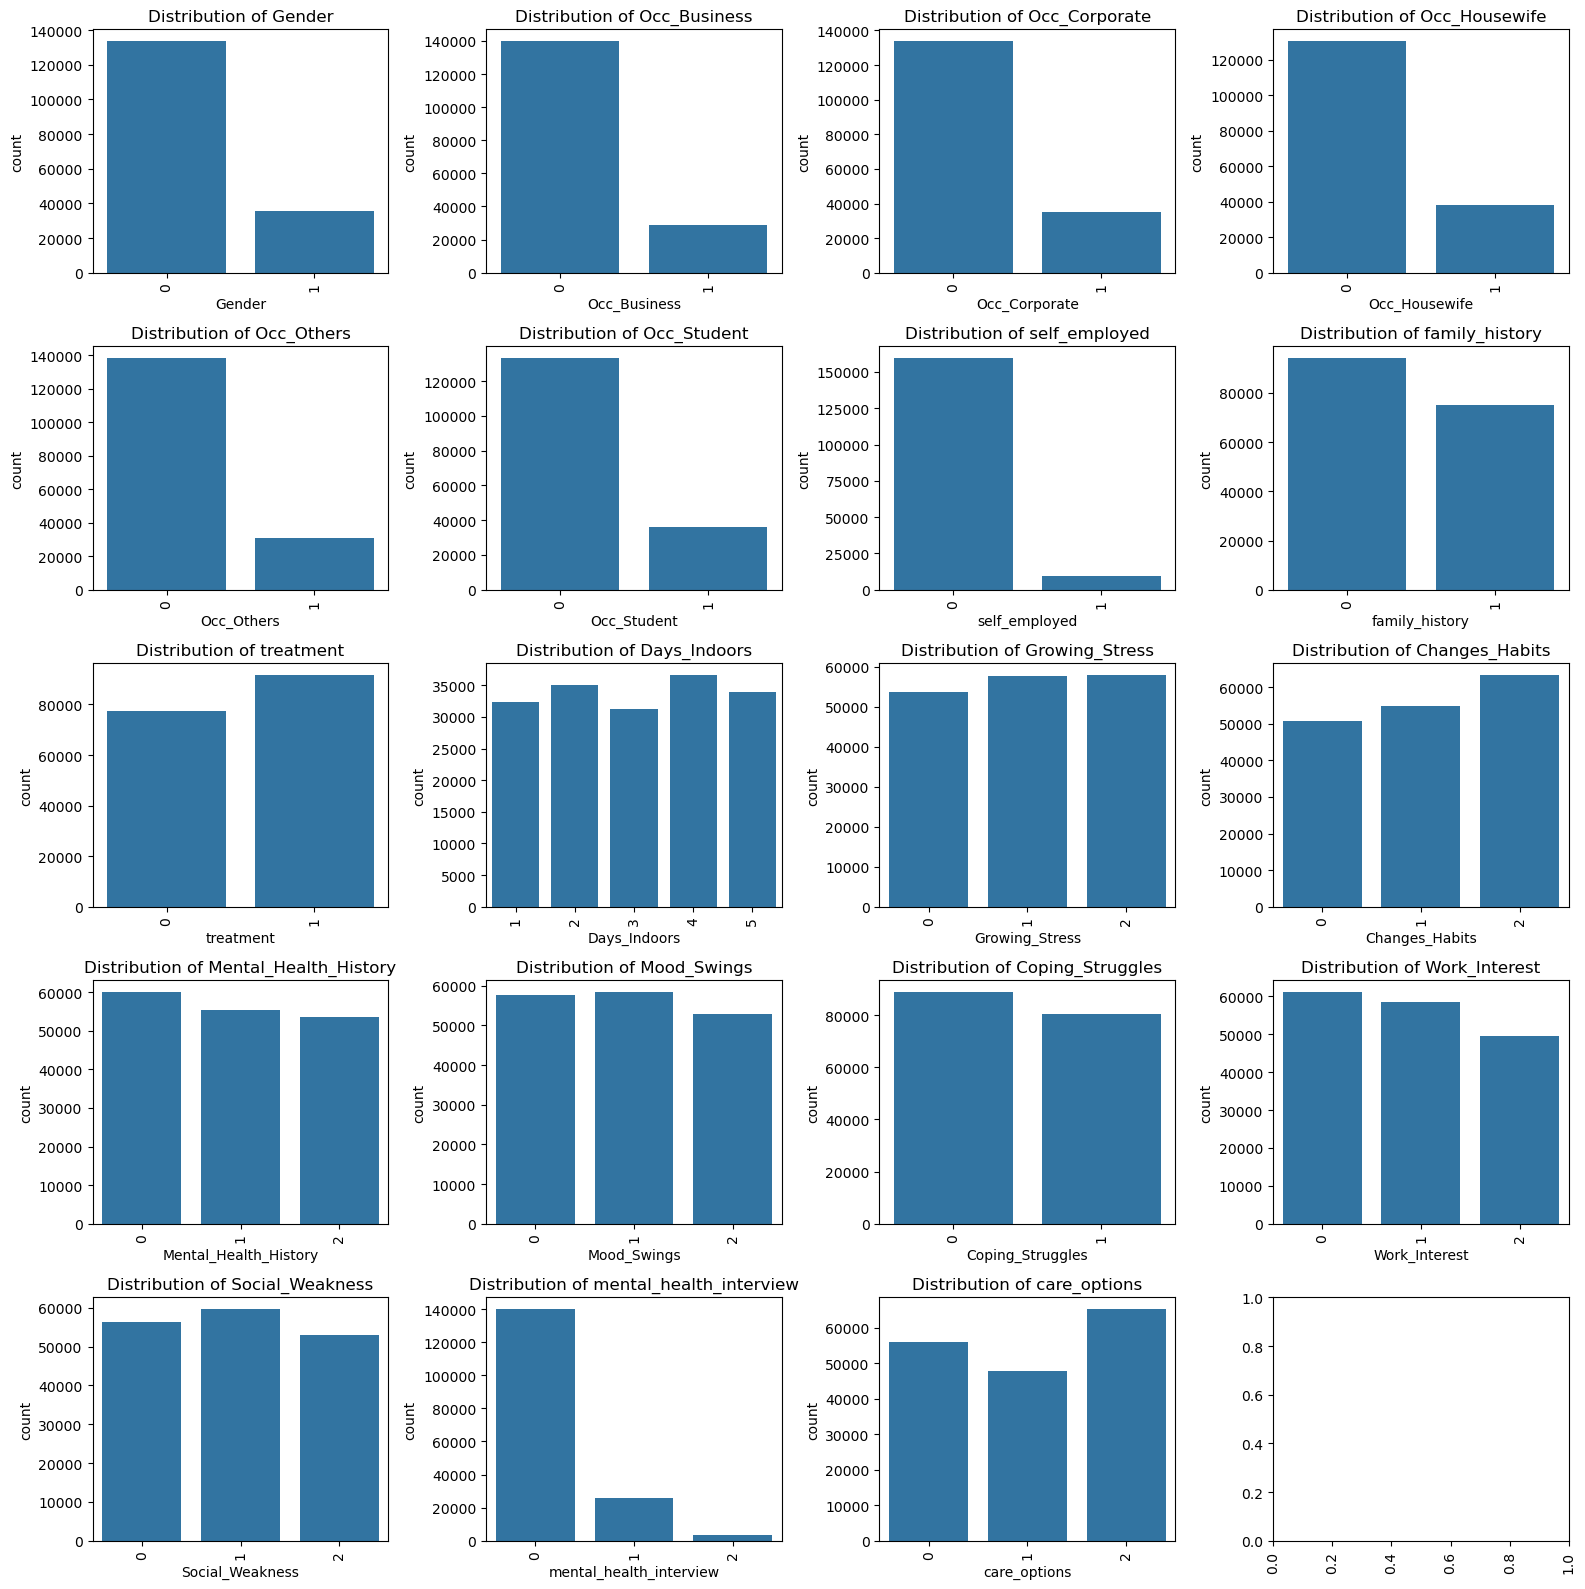

In [23]:
# Plot distribution of respondents for each feature
selected_features = [
    'Gender',
    'Occ_Business',
    'Occ_Corporate',
    'Occ_Housewife',
    'Occ_Others',
    'Occ_Student',
    'self_employed',
    'family_history',
    'treatment',
    'Days_Indoors',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Mood_Swings',
    'Coping_Struggles',
    'Work_Interest',
    'Social_Weakness',
    'mental_health_interview',
    'care_options',
]
ss = mh_df[selected_features]

# Create subplots for each categorical feature, side by side
cols = len(selected_features)  
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 16))
for i, col in enumerate(ss.columns):
    row, col_num = divmod(i, 4)
    sns.countplot(data=ss, x=col, ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Distribution of {col}')
    axes[row, col_num].tick_params(axis='x', rotation=90)
# Avoid overlap
plt.tight_layout()
plt.xticks(rotation=90)
# Show plots
_ = plt.show()


#### Visualizing Relationships

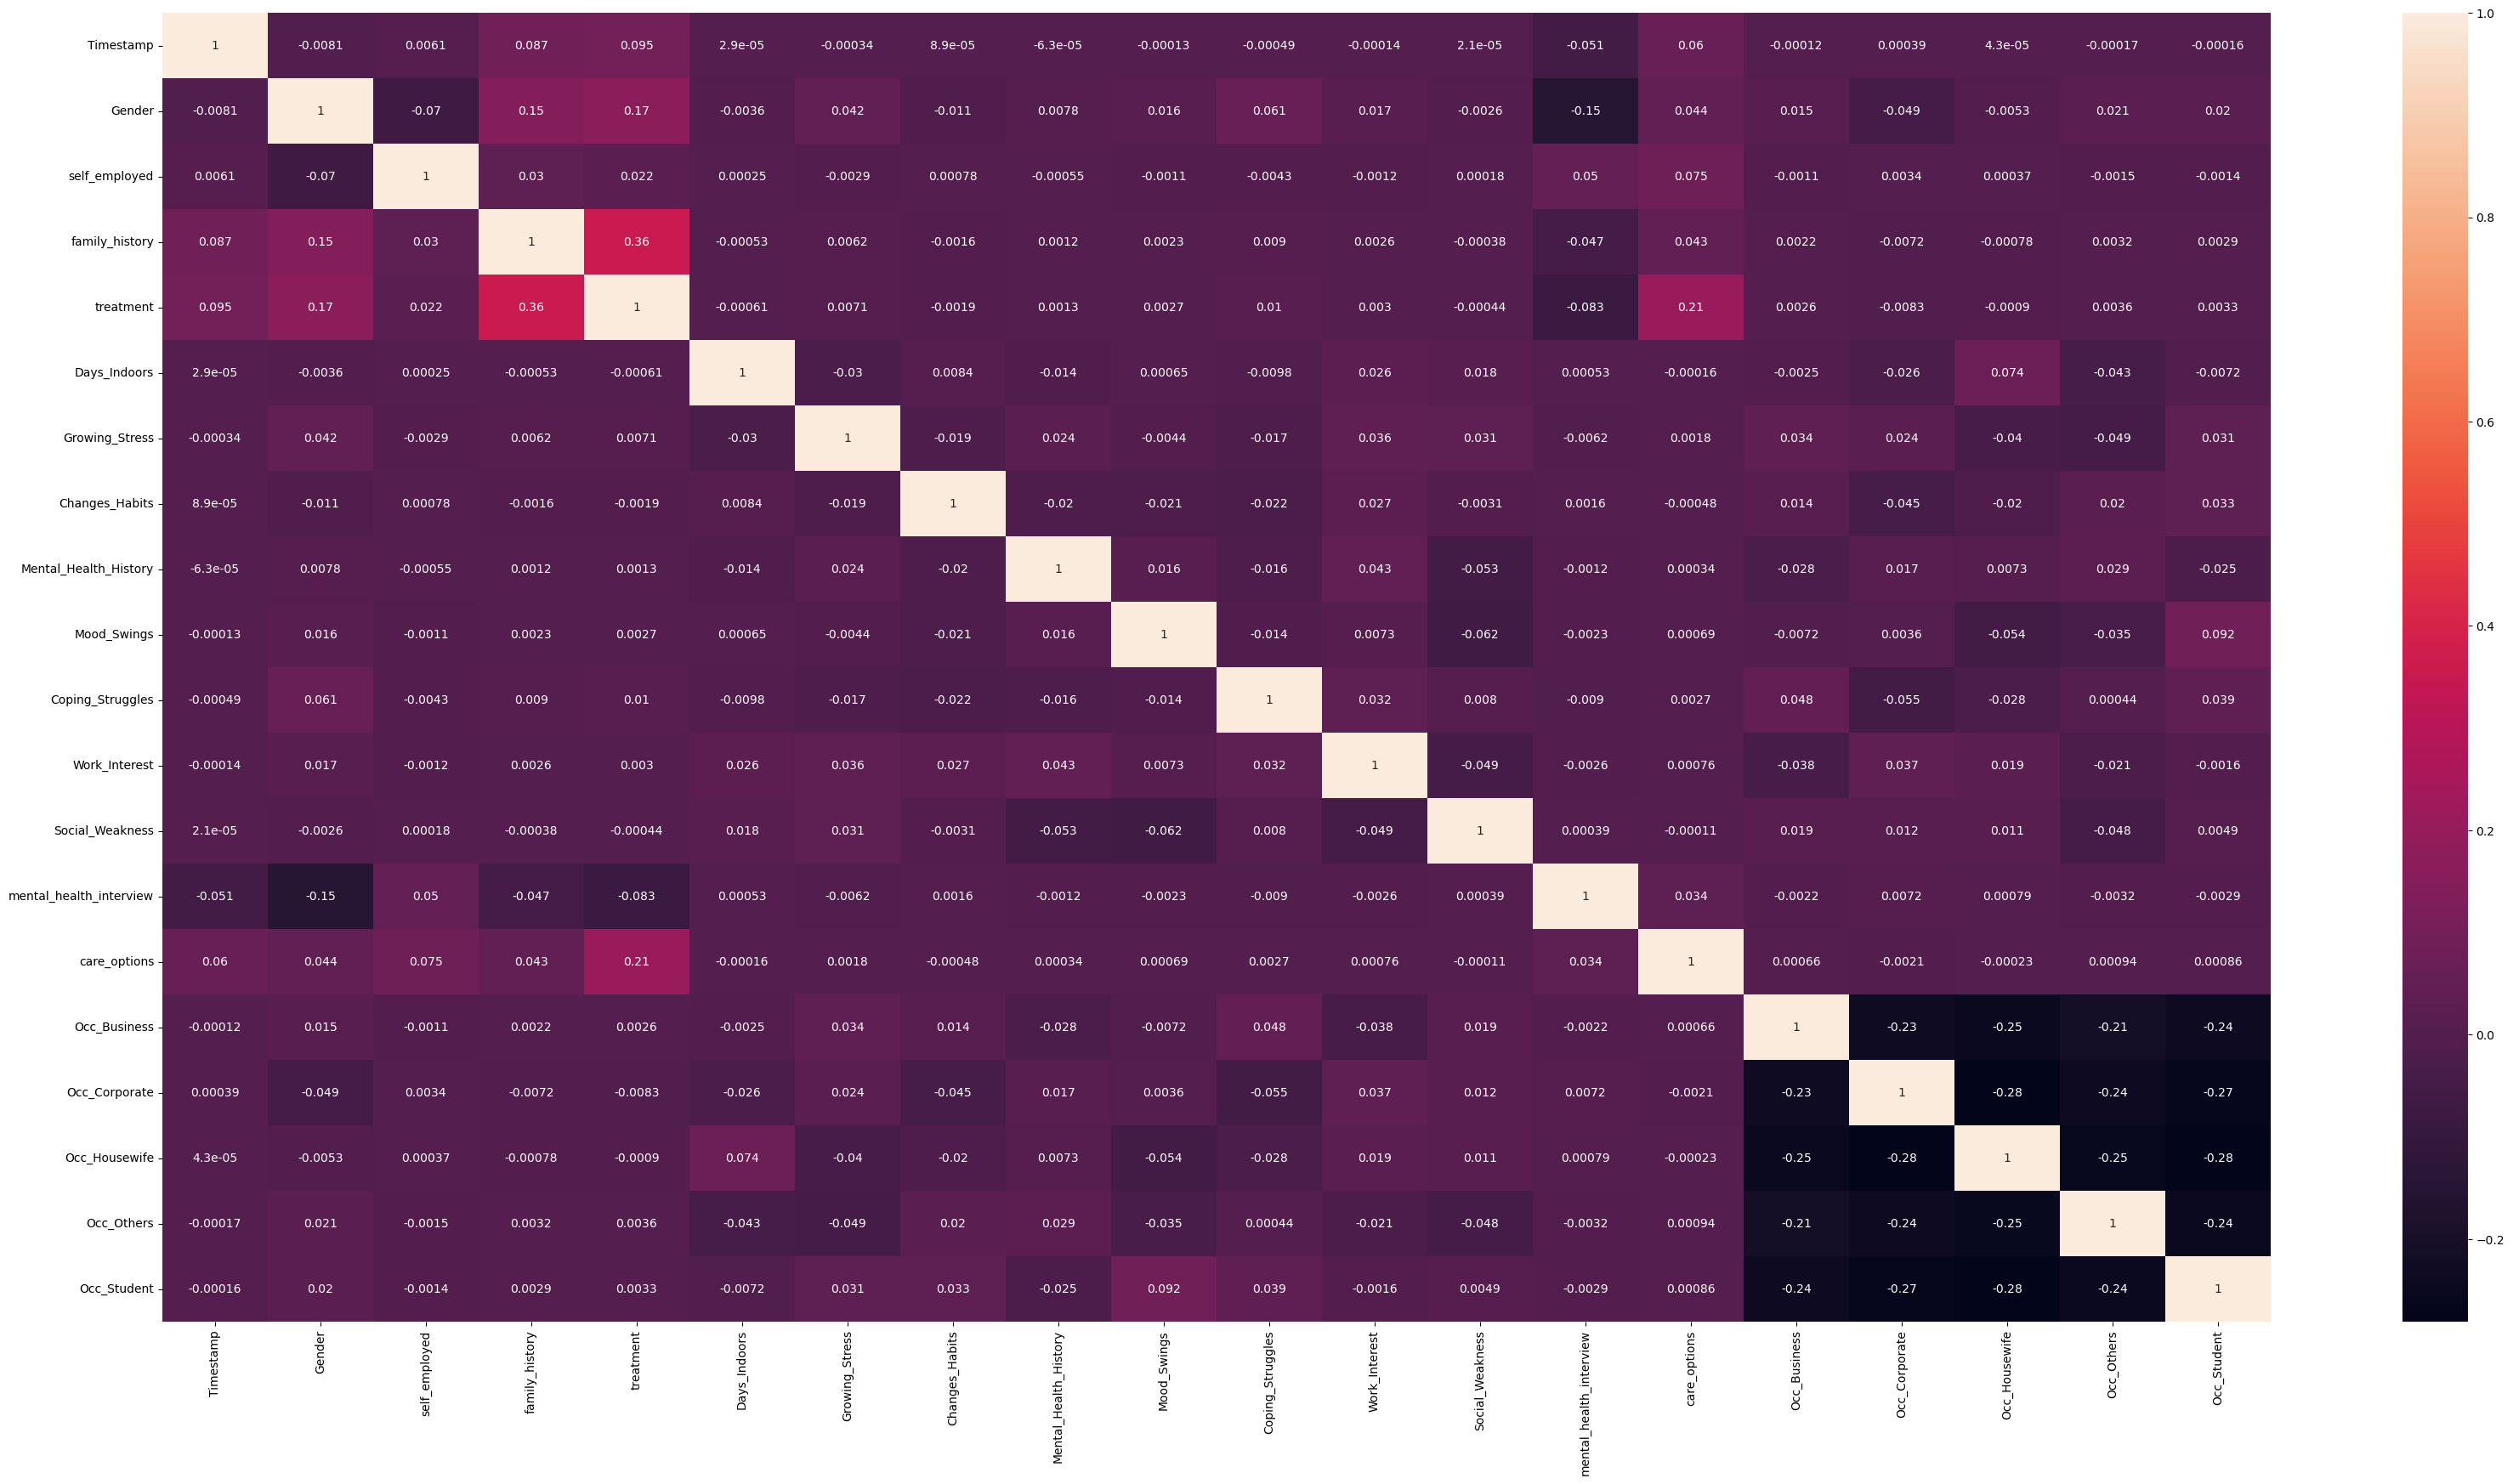

In [39]:
# Show pairplot and check for correlation

plt.figure(figsize=(40, 20))
# Spearman's matrix is showing very weak correlation.
#correlation_matrix_spearman = mh_df.corr(method='spearman')
#_ = sns.heatmap(correlation_matrix_spearman, annot=True)

# Let's try kendall's Tau
correlation_matrix_kendall = mh_df.corr(method='kendall')
_ = sns.heatmap(correlation_matrix_kendall, annot=True)


None of the features are showing very strong correlations.
Let's try other methods when we get to the EDA stage.

### 10. Save Cleaned Data

In [25]:
# Save cleaned dataset to file 'MentalHealthCleaned.csv'
mh_df.to_csv('MentalHealthCleaned.csv', index=False)  # Replace with your output path


### 11. Conclusion



In this datawrangling step, we successfully transformed the menthal health dataset into a structured format suitable for further analysis. The cleaned data was saved into a new file named 'MentalHealthCleaned.csv'. 

Here's a summary of the key steps and findings:

***Dataset Subsetting:***
We focused on respondents from the United States by creating a subset, ensuring that subsequent analysis is geographically relevant.

#### Handling Categorical Features:

**Binary Features:*** For features with two classes ('Yes' or 'No'), we used binary encoding where 'Yes' is represented as 1 and 'No' as 0. This helps simplify these categorical variables for numerical operations.

***Ordinal Features:*** For features with three classes, we identified a natural order (e.g., 'No', 'Maybe', 'Yes'). This allowed us to assign ordinal values (0, 1, and 2), preserving the relative ranking of responses.

***Days_Indoors:*** We encoded this ordinal feature in a way that reflects more weight to being outdoors frequently, preserving the meaningful order of time spent indoors.

***One-Hot Encoding for Nominal Categories:*** For the <i>'Occupation'</i> feature, which lacks a natural order, we applied one-hot encoding. This prevents introducing unintended ordinal relationships that could lead to incorrect interpretations during modeling.

***Datetime Conversion:*** The <i>'Timestamp'</i> column was reformatted to the datetime data type, enabling easier manipulation and extraction of time-based insights.

By applying these transformations, we have successfully cleaned and preprocessed the dataset. All features are now either numeric or encoded in a way that preserves the necessary information. The dataset is now in a suitable form for further exploratory data analysis (EDA), feature engineering, or machine learning modeling.